In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv("C:\\Users\\linet\\Downloads\\MentalHealthSurvey.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    87 non-null     object 
 1   age                       87 non-null     int64  
 2   university                87 non-null     object 
 3   degree_level              87 non-null     object 
 4   degree_major              87 non-null     object 
 5   academic_year             87 non-null     object 
 6   cgpa                      87 non-null     object 
 7   residential_status        87 non-null     object 
 8   campus_discrimination     87 non-null     object 
 9   sports_engagement         87 non-null     object 
 10  average_sleep             87 non-null     object 
 11  study_satisfaction        87 non-null     int64  
 12  academic_workload         87 non-null     int64  
 13  academic_pressure         87 non-null     int64  
 14  financial_co

In [4]:
df.isna().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
Self-Efficacy               9
isolation                   0
future_insecurity           0
stress_relief_activities    0
Mental-Health               9
dtype: int64

In [5]:
# Fill missing values in column 'A' with the mean of column 'A'
df['Self-Efficacy'].fillna(df['Self-Efficacy'].mean(), inplace=True)

# Fill missing values in column 'B' with the mean of column 'B'
df['Mental-Health'].fillna(df['Mental-Health'].mean(), inplace=True)


In [6]:
df.drop(['degree_major', 'university'], axis=1, inplace=True)

In [7]:
df

,gender,age,degree_level,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,...,academic_pressure,financial_concerns,social_relationships,depression,anxiety,Self-Efficacy,isolation,future_insecurity,stress_relief_activities,Mental-Health
0,Male,39,Undergraduate,2nd year,3.0-3.5,Off-Campus,No,No Sports,4-6 hrs,5,...,5,4,3,2,1,34.000000,1,2,"Religious Activities, Social Connections, Onli...",28.000000
1,Male,40,Postgraduate,3rd year,3.0-3.5,Off-Campus,No,1-3 times,4-6 hrs,5,...,4,1,3,3,3,38.000000,3,4,Online Entertainment,36.000000
2,Male,39,Undergraduate,3rd year,2.5-3.0,Off-Campus,No,1-3 times,2-4 hrs,5,...,5,3,4,2,3,27.000000,3,1,"Religious Activities, Sports and Fitness, Onli...",48.000000
3,Male,28,Undergraduate,3rd year,2.5-3.0,On-Campus,No,No Sports,4-6 hrs,3,...,4,4,1,5,5,24.000000,5,3,Online Entertainment,44.000000
4,Female,39,Undergraduate,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,4-6 hrs,3,...,5,2,3,5,5,31.000000,4,4,Online Entertainment,52.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,Undergraduate,4th year,3.0-3.5,On-Campus,No,No Sports,7-8 hrs,4,...,1,4,4,2,3,30.641026,1,2,"Online Entertainment, Outdoor Activities, Sleep",47.230769
83,Female,22,Undergraduate,4th year,3.5-4.0,Off-Campus,Yes,No Sports,2-4 hrs,5,...,5,5,1,5,5,30.641026,5,5,"Religious Activities, Sleep",47.230769
84,Male,21,Undergraduate,2nd year,2.0-2.5,Off-Campus,No,No Sports,4-6 hrs,5,...,2,4,3,1,2,30.641026,1,1,"Religious Activities, Sports and Fitness, Soci...",47.230769
85,Male,22,Undergraduate,2nd year,2.5-3.0,Off-Campus,No,No Sports,4-6 hrs,3,...,3,3,2,3,4,30.641026,4,5,Sleep,47.230769


## Analysis of the relationship between CGPA and Mental Health

In [8]:
# Analysis of the relationship between CGPA and Mental Health
# Function to convert CGPA ranges to numerical values
def process_cgpa(value):
    if isinstance(value, str) and '-' in value:  # Ensure it's a string before checking
        low, high = map(float, value.split('-'))
        return (low + high) / 2
    return float(value)  # If it's already a float, return it as is

# Apply function to transform CGPA column
df['cgpa'] = df['cgpa'].apply(process_cgpa)

# Spearman's correlation
spearman_corr1, _ = stats.spearmanr(df['cgpa'], df['Mental-Health'])
spearman_corr2, _ = stats.spearmanr(df['cgpa'], df['depression'])
spearman_corr3, _ = stats.spearmanr(df['cgpa'], df['anxiety'])
print("Spearman Correlation of CGPA vs Mental Health:", spearman_corr1)
print("Spearman Correlation of CGPA vs depression:", spearman_corr2)
print("Spearman Correlation of CGPA vs anxiety:", spearman_corr3)

Spearman Correlation of CGPA vs Mental Health: 0.02279514334938499
Spearman Correlation of CGPA vs depression: 0.1195342470011546
Spearman Correlation of CGPA vs anxiety: 0.054005631448431325


In [9]:
# Define independent variable (CGPA) and dependent variables (Mental Health factors)
X = df["cgpa"]
Y = df[["depression", "anxiety", "Mental-Health"]]  # Multiple dependent variables

# Add constant for intercept
X = sm.add_constant(X)

# Perform regression analysis for each mental health factor
for outcome in Y.columns:
    model = sm.OLS(Y[outcome], X).fit()
    print(f"\nRegression Results: CGPA -> {outcome}")
    print(model.summary())


Regression Results: CGPA -> depression
                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4391
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.509
Time:                        07:09:55   Log-Likelihood:                -149.96
No. Observations:                  87   AIC:                             303.9
Df Residuals:                      85   BIC:                             308.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [10]:
df.head()

,gender,age,degree_level,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,...,academic_pressure,financial_concerns,social_relationships,depression,anxiety,Self-Efficacy,isolation,future_insecurity,stress_relief_activities,Mental-Health
0,Male,39,Undergraduate,2nd year,3.25,Off-Campus,No,No Sports,4-6 hrs,5,...,5,4,3,2,1,34.0,1,2,"Religious Activities, Social Connections, Onli...",28.0
1,Male,40,Postgraduate,3rd year,3.25,Off-Campus,No,1-3 times,4-6 hrs,5,...,4,1,3,3,3,38.0,3,4,Online Entertainment,36.0
2,Male,39,Undergraduate,3rd year,2.75,Off-Campus,No,1-3 times,2-4 hrs,5,...,5,3,4,2,3,27.0,3,1,"Religious Activities, Sports and Fitness, Onli...",48.0
3,Male,28,Undergraduate,3rd year,2.75,On-Campus,No,No Sports,4-6 hrs,3,...,4,4,1,5,5,24.0,5,3,Online Entertainment,44.0
4,Female,39,Undergraduate,3rd year,3.25,Off-Campus,Yes,No Sports,4-6 hrs,3,...,5,2,3,5,5,31.0,4,4,Online Entertainment,52.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    87 non-null     object 
 1   age                       87 non-null     int64  
 2   degree_level              87 non-null     object 
 3   academic_year             87 non-null     object 
 4   cgpa                      87 non-null     float64
 5   residential_status        87 non-null     object 
 6   campus_discrimination     87 non-null     object 
 7   sports_engagement         87 non-null     object 
 8   average_sleep             87 non-null     object 
 9   study_satisfaction        87 non-null     int64  
 10  academic_workload         87 non-null     int64  
 11  academic_pressure         87 non-null     int64  
 12  financial_concerns        87 non-null     int64  
 13  social_relationships      87 non-null     int64  
 14  depression  

In [12]:
df.isna().sum()

gender                      0
age                         0
degree_level                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
Self-Efficacy               0
isolation                   0
future_insecurity           0
stress_relief_activities    0
Mental-Health               0
dtype: int64

## Analysis of the Impact of academic pressure


In [13]:
# 2. How does anxiety, depression and sleep satisfaction correlate with academic pressure?
# Now, compute correlations
correlation_academic_pressure = df['anxiety'].corr(df['academic_pressure'])
correlation_academic_pressure = df['depression'].corr(df['academic_pressure'])
correlation_academic_pressure = df['study_satisfaction'].corr(df['academic_pressure'])
print(f'Correlation between anxiety and academic pressure: {correlation_academic_pressure}')
print(f'Correlation between depression and academic pressure: {correlation_academic_pressure}')
print(f'Correlation between study satisfaction and academic pressure: {correlation_academic_pressure}')

Correlation between anxiety and academic pressure: -0.10215318326381113
Correlation between depression and academic pressure: -0.10215318326381113
Correlation between study satisfaction and academic pressure: -0.10215318326381113


In [14]:
# Define independent and dependent variables
X = df["academic_pressure"]
Y = df["depression"]

# Add constant for intercept
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(Y, X).fit()
print("\nRegression Results: Academic Pressure -> Depression")
print(model.summary())



Regression Results: Academic Pressure -> Depression
                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     13.60
Date:                Fri, 30 May 2025   Prob (F-statistic):           0.000397
Time:                        07:09:55   Log-Likelihood:                -143.72
No. Observations:                  87   AIC:                             291.4
Df Residuals:                      85   BIC:                             296.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Stress Relief Methods

In [15]:
categorical_columns = ["gender", "degree_level", "academic_year", "residential_status",
                       "campus_discrimination", "sports_engagement", "average_sleep", 
                       "stress_relief_activities"]
df[categorical_columns] = df[categorical_columns].astype("category")

# Chi-Square Test (Association between stress relief methods & mental health)
contingency_table = pd.crosstab(df["stress_relief_activities"], df["Mental-Health"])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")


Chi-Square Test: chi2=597.4353869047619, p-value=0.4298157539119624


## Is thare a relationship between sports and study satisfaction?

C:\Users\linet\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


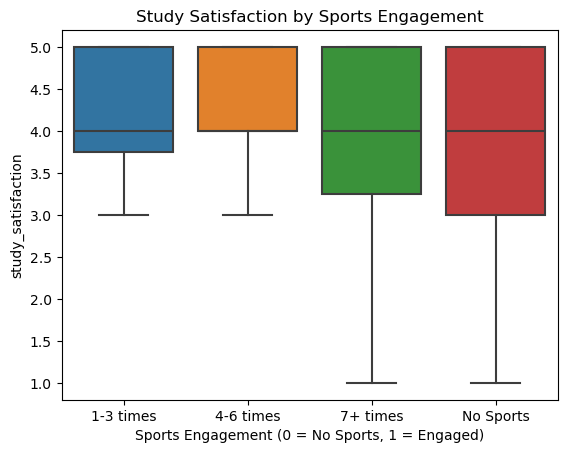

In [16]:
df['sports_engagement'] = df['sports_engagement'].astype('category')
sns.boxplot(x='sports_engagement', y='study_satisfaction', data=df)
plt.title('Study Satisfaction by Sports Engagement')
plt.xlabel('Sports Engagement (0 = No Sports, 1 = Engaged)')
plt.show()

## Correlation betweeen financial concerns and academic pressure/CGPA?

In [17]:
correlation_academic_pressure = df['financial_concerns'].corr(df['academic_pressure'])
correlation_cgpa = df['financial_concerns'].corr(df['cgpa'])

print(f'Correlation between financial concerns and academic pressure: {correlation_academic_pressure}')
print(f'Correlation between financial concerns and CGPA: {correlation_cgpa}')

Correlation between financial concerns and academic pressure: 0.05479287477367711
Correlation between financial concerns and CGPA: 0.033545307338300565


# Workload and CGPA

Pearson Correlation: -0.14672187824867425, P-value: 0.1750711423209485
                            OLS Regression Results                            
Dep. Variable:                   cgpa   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.870
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.175
Time:                        07:09:56   Log-Likelihood:                -112.17
No. Observations:                  87   AIC:                             228.3
Df Residuals:                      85   BIC:                             233.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

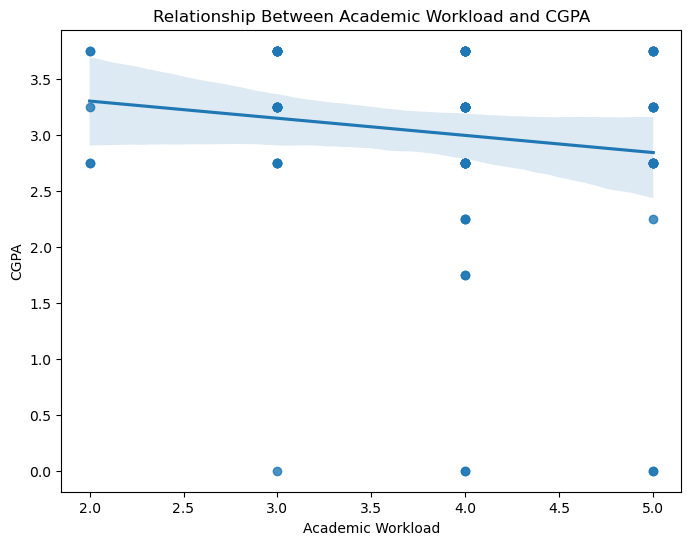

In [18]:
# Strip column names to remove unwanted spaces
df.columns = df.columns.str.strip()

# Check if required columns exist
if "academic_workload" in df.columns and "cgpa" in df.columns:
    # Pearson Correlation
    correlation, p_value = stats.pearsonr(df["academic_workload"], df["cgpa"])
    print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

    # Regression Analysis
    X = df["academic_workload"]
    Y = df["cgpa"]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit regression model
    model = sm.OLS(Y, X).fit()

    # Display results
    print(model.summary())

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.regplot(x="academic_workload", y="cgpa", data=df)
    plt.title("Relationship Between Academic Workload and CGPA")
    plt.xlabel("Academic Workload")
    plt.ylabel("CGPA")
    plt.show()

else:
    print("Error: One or more columns ('academic_workload', 'cgpa') not found. Verify dataset structure.")

